<a href="https://colab.research.google.com/github/EnterTheBeginning/SmartHomeEnergyForecasting/blob/master/FModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Modeling the Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model

from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import  Conv1D, MaxPool1D, Dense, Activation, GlobalMaxPool1D
from keras.utils import np_utils
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout




In [46]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DataAnalytics/~Code/Data/FmeterClean.csv',index_col='Date & Time',parse_dates=['Date & Time'])


In [48]:
df.head()

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.711407,0.010633,0.003387,0.010633,0.124854,0.003152,0.008454,0.000973,0.000758,0.001656,...,0.000163,0.007337,0.032004,0.016924,0.002051,0.035576,0.003058,0.025669,0.539356,0.172051
2016-01-01 00:15:00,0.764641,0.010922,0.002976,0.010922,0.022447,0.003491,0.166584,0.000560,0.000556,0.001860,...,0.000139,0.006689,0.031601,0.016721,0.001993,0.033170,0.002943,0.025352,0.596543,0.168098
2016-01-01 00:30:00,0.797838,0.010831,0.003871,0.010831,0.089558,0.003437,0.036343,0.000978,0.000889,0.002004,...,0.000104,0.007033,0.031698,0.016774,0.002082,0.034226,0.003029,0.025446,0.628852,0.168986
2016-01-01 00:45:00,0.883651,0.011289,0.003856,0.011289,0.058804,0.003429,0.193307,0.000860,0.000769,0.002227,...,0.000048,0.006831,0.030987,0.016384,0.002196,0.032569,0.003361,0.024742,0.719163,0.164488
2016-01-01 01:00:00,0.594470,0.010449,0.002047,0.010449,0.031788,0.003083,0.008712,0.000416,0.000438,0.001193,...,0.000047,0.006911,0.031721,0.016867,0.001903,0.032852,0.002922,0.025539,0.428216,0.166254


In [0]:
weather = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/DataAnalytics/~Code/Data/FweatherClean.csv',index_col='time')


In [50]:
weather.head()

,temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,
2016-01-01 05:00:00,36.52,clear-night,0.61,10.0,Clear,29.76,1016.88,9.11,NaN,281,0.0,24.27,0.0
2016-01-01 06:00:00,36.32,partly-cloudy-night,0.60,10.0,Mostly Cloudy,29.60,1016.23,8.93,0.75,285,0.0,23.71,0.0
2016-01-01 07:00:00,35.77,clear-night,0.61,10.0,Clear,29.49,1015.99,7.90,NaN,282,0.0,23.57,0.0
2016-01-01 08:00:00,35.62,clear-night,0.63,10.0,Clear,31.04,1016.03,5.35,NaN,264,0.0,24.11,0.0
2016-01-01 09:00:00,35.97,clear-night,0.62,10.0,Clear,30.41,1015.89,6.80,NaN,267,0.0,24.13,0.0


###First model for energy consumption forecast 

In [51]:
df.shape

(501847, 23)

Downsample by day

In [52]:
df_downsample = df.resample('D').pad().mean()
df_downsample.shape


(23,)

Its not useful since it only shows 12:00 AM 

###Lets split the dataset into months

In [0]:
b = np.array_split(df, 12)

In [54]:
b[11].shape

(41820, 23)

In [55]:
b[11].head()

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2016-12-02 23:00:00,0.609150,0.009067,0.003367,0.009067,0.006900,0.003067,0.008817,0.001367,0.000400,0.001600,...,0.000817,0.007383,0.050900,0.017317,0.001900,0.046833,0.002817,0.318800,0.103283,0.505867
2016-12-02 23:01:00,0.620067,0.009067,0.003567,0.009067,0.008617,0.002867,0.008833,0.001367,0.000433,0.001767,...,0.000800,0.007400,0.051750,0.017617,0.002067,0.047300,0.003017,0.324050,0.106500,0.513567
2016-12-02 23:02:00,1.332400,0.010100,0.002533,0.010100,0.007450,0.004417,0.009983,0.000367,0.000500,0.001667,...,0.000500,0.006150,0.050683,0.017100,0.002467,0.046650,0.003183,0.316117,0.829950,0.502450
2016-12-02 23:03:00,0.661367,0.009200,0.002833,0.009200,0.008417,0.003117,0.008983,0.001200,0.000400,0.001233,...,0.000767,0.007250,0.044950,0.015183,0.001700,0.041483,0.002483,0.281483,0.214700,0.446667
2016-12-02 23:04:00,0.613750,0.009033,0.003500,0.009033,0.008550,0.002850,0.008850,0.001300,0.000467,0.001733,...,0.000817,0.007400,0.051133,0.017383,0.001950,0.047383,0.002817,0.320700,0.105200,0.508550


In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


### Resample to Every Hour

In [57]:
print('Original ', df.shape )
df_resample = df.resample('h').mean() 
print('Resample ' ,df_resample.shape)



Original  (501847, 23)
Resample  (8784, 23)


### Scaling features to 0-1

In [58]:
#@title Default title text
values = df_resample.values 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#We dont want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.077668   0.001094   0.000628   0.001094   0.302566   0.009971   
2   0.075616   0.001084   0.000602   0.001084   0.262477   0.009170   
3   0.071802   0.001085   0.000525   0.001085   0.191402   0.009579   
4   0.075191   0.001082   0.000600   0.001082   0.274910   0.009544   
5   0.075623   0.001068   0.000538   0.001068   0.180600   0.009440   

   var7(t-1)  var8(t-1)  var15(t-1)  var16(t-1)    ...     var14(t)  var15(t)  \
1   0.167852   0.001513    0.026950    0.034386    ...     0.000090  0.026609   
2   0.167416   0.001389    0.026609    0.034519    ...     0.000104  0.026515   
3   0.167225   0.001120    0.026515    0.034238    ...     0.000093  0.026751   
4   0.167340   0.001384    0.026751    0.034231    ...     0.000198  0.026268   
5   0.245695   0.001158    0.026268    0.034493    ...     0.000291  0.026749   

   var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  var22(t)  \
1  0.034519

##Testing our first model

In [159]:
m12h.describe(include = 'all')

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,...,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,1.450958,0.823352,0.004476,0.823352,0.073573,0.009897,0.132757,0.001333,0.000651,0.002543,...,0.012564,0.010964,0.306046,0.011728,0.010659,0.048954,0.093347,0.132501,0.650160,0.800798
std,1.167410,1.766169,0.002750,1.766169,0.025939,0.025002,0.107143,0.000869,0.000477,0.001497,...,0.066862,0.029011,0.257654,0.009432,0.035989,0.027390,0.367762,0.132056,0.519073,0.699313
min,0.399114,0.004527,0.000642,0.004527,0.034519,0.002126,0.008434,0.000246,0.000094,0.000340,...,0.000288,0.003485,0.036003,0.007908,0.001350,0.027272,0.002366,0.024103,0.205323,0.168350
25%,0.808342,0.009339,0.002758,0.009339,0.057442,0.002789,0.052963,0.000824,0.000354,0.001423,...,0.000533,0.006647,0.050039,0.008729,0.002092,0.041194,0.002709,0.027712,0.380855,0.255310
50%,1.041675,0.010561,0.003506,0.010561,0.071322,0.003118,0.116407,0.001008,0.000571,0.002037,...,0.000649,0.007004,0.239468,0.008982,0.002270,0.043470,0.002908,0.028588,0.471287,0.611901
75%,1.475964,0.451688,0.005548,0.451688,0.084875,0.003338,0.189804,0.001625,0.000749,0.003340,...,0.000819,0.007272,0.557524,0.009310,0.002410,0.045537,0.003109,0.302104,0.642659,1.019236
max,5.684735,7.832188,0.016347,7.832188,0.234611,0.255300,0.494549,0.005721,0.003503,0.007984,...,0.630730,0.249350,0.816996,0.085651,0.312721,0.198038,2.622222,0.328476,2.893218,3.351595


In [158]:
print('Original ', b[11].shape )
m12h = b[11].resample('h').mean() 
print('Resample ' ,m12h.shape)


Original  (41820, 23)
Resample  (697, 23)


Lets have the first 20 days as our Training data  
and last 10 days of month for test  
For the ease of model We just use the Total energy consumption at first

In [0]:
split = 24*20
X = m12h
X_train = m12h.iloc[:split,4:-2].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,4:-2].values
y_test = m12h.iloc[split:,0].values
#X = pd.date_range(start='12/1/16', end='12/30/16',freq='h')


#X= m12h.iloc[:,0].values
#y= m12h.iloc[:,0].values
y_train = m12h.iloc[:split,0].values
y_test = m12h.iloc[split:,0].values

In [0]:
split = 24*20
#Train
training_set = m12h.iloc[:split,0:1].values
test_set = m12h.iloc[split:,0:1].values


In [0]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [0]:
X_train = []
y_train = []
for i in range(80,480):
    X_train.append(training_set_scaled[i-80:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(80,217):
    X_test.append(test_set_scaled[i-80:i,0])
    y_test.append(test_set_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))

In [147]:
""#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


''

##Time series DNN:

In [148]:
model = Sequential()
model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 80))
model.add(Dense(output_dim = 35, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=80, units=20, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=35, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [150]:
model.fit(X_train, y_train, batch_size = 6, nb_epoch = 10, shuffle=0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 0.1441 - mean_absolute_error: 0.1441
Epoch 2/10
400/400 [==============================] - 0s 211us/step - loss: 0.1198 - mean_absolute_error: 0.1198
Epoch 3/10
400/400 [==============================] - 0s 212us/step - loss: 0.1120 - mean_absolute_error: 0.1120
Epoch 4/10
400/400 [==============================] - 0s 200us/step - loss: 0.1092 - mean_absolute_error: 0.1092
Epoch 5/10
400/400 [==============================] - 0s 211us/step - loss: 0.1050 - mean_absolute_error: 0.1050
Epoch 6/10
400/400 [==============================] - 0s 203us/step - loss: 0.1017 - mean_absolute_error: 0.1017
Epoch 7/10
400/400 [==============================] - 0s 199us/step - loss: 0.0976 - mean_absolute_error: 0.0976
Epoch 8/10
400/400 [==============================] - 0s 216us/step - loss: 0.0944 - mean_absolute_error: 0.0944
Epoch 9/10
400/400 [==============================] - 0s 215us/step - loss: 0.0897 - mean_absolute

In [151]:
prediction = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])
prediction = sc.inverse_transform(prediction)


Test Loss: 0.10675471172715625
Test accuracy: 0.10675471172715625


Text(0.5, 0, '120 Hour Prediction  ')

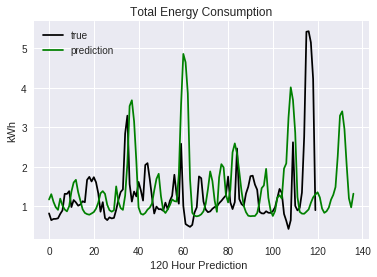

In [155]:
plt.figure(1)
plt.plot(test_set[:120],label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('120 Hour Prediction  ')

In [0]:
dataset_total = pd.concat((m12h["Usage [kW]"][:split],m12h["Usage [kW]"][split:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


In [0]:
X_test = []
for i in range(80,278):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Text(0.5, 0, 'Next 200 Hours')

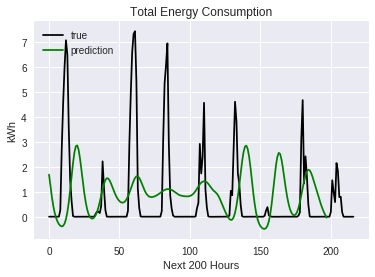

In [121]:
plt.figure(1)
plt.plot(test_set,label='true',color = 'black')
plt.plot(predicted_stock_price,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')

##Fully Connected Deep Neural Network using Smart meters

In [0]:
X= m12h.iloc[:,1:].values
y= m12h.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [72]:
model = Sequential()
model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 22))
model.add(Dense(output_dim = 35, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=22, units=20, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=35, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [73]:
model.fit(X_train, y_train, batch_size = 6, nb_epoch = 10, shuffle=0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
557/557 [==============================] - 0s 612us/step - loss: 0.9777 - mean_absolute_error: 0.9777
Epoch 2/10
557/557 [==============================] - 0s 177us/step - loss: 0.2631 - mean_absolute_error: 0.2631
Epoch 3/10
557/557 [==============================] - 0s 173us/step - loss: 0.1406 - mean_absolute_error: 0.1406
Epoch 4/10
557/557 [==============================] - 0s 185us/step - loss: 0.0750 - mean_absolute_error: 0.0750
Epoch 5/10
557/557 [==============================] - 0s 175us/step - loss: 0.0264 - mean_absolute_error: 0.0264
Epoch 6/10
557/557 [==============================] - 0s 180us/step - loss: 0.0179 - mean_absolute_error: 0.0179
Epoch 7/10
557/557 [==============================] - 0s 175us/step - loss: 0.0120 - mean_absolute_error: 0.0120
Epoch 8/10
557/557 [==============================] - 0s 177us/step - loss: 0.0131 - mean_absolute_error: 0.0131
Epoch 9/10
557/557 [==============================] - 0s 183us/step - loss: 0.0142 - mean_absolu

In [74]:
prediction = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.010340064311666147
Test accuracy: 0.010340064311666147


Text(0.5, 0, '2019 - 2035')

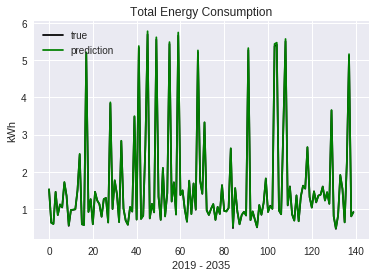

In [75]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('2019 - 2035')

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501847 entries, 2016-01-01 00:00:00 to 2016-12-31 23:59:00
Data columns (total 23 columns):
Usage [kW]                  501847 non-null float64
Generation [kW]             501847 non-null float64
WaterHeater [kW]            501847 non-null float64
Solar [kW]                  501847 non-null float64
Refrigerator [kW]           501847 non-null float64
Microwave [kW]              501847 non-null float64
Furnace [kW]                501847 non-null float64
WaterHeater3 [kW]           501847 non-null float64
WaterHeater2 [kW]           501847 non-null float64
WaterHeater1 [kW]           501847 non-null float64
Master_Bdrm [kW]            501847 non-null float64
Front_Bdrm [kW]             501847 non-null float64
Kit_StoveWall [kW]          501847 non-null float64
Dishwasher_Disposal [kW]    501847 non-null float64
Kit_SinkWall [kW]           501847 non-null float64
Family_Rm [kW]              501847 non-null float64
Kit_Half-Bath_Foyer [kW

In [77]:
df.dtypes


Usage [kW]                  float64
Generation [kW]             float64
WaterHeater [kW]            float64
Solar [kW]                  float64
Refrigerator [kW]           float64
Microwave [kW]              float64
Furnace [kW]                float64
WaterHeater3 [kW]           float64
WaterHeater2 [kW]           float64
WaterHeater1 [kW]           float64
Master_Bdrm [kW]            float64
Front_Bdrm [kW]             float64
Kit_StoveWall [kW]          float64
Dishwasher_Disposal [kW]    float64
Kit_SinkWall [kW]           float64
Family_Rm [kW]              float64
Kit_Half-Bath_Foyer [kW]    float64
Washing_Machine [kW]        float64
Guest_Bdrm_SmkDet [kW]      float64
Dryer [kW]                  float64
Basement [kW]               float64
Phase_B [kW]                float64
Phase_A [kW]                float64
dtype: object

In [78]:
df.describe(include = 'all')

,Usage [kW],Generation [kW],WaterHeater [kW],Solar [kW],Refrigerator [kW],Microwave [kW],Furnace [kW],WaterHeater3 [kW],WaterHeater2 [kW],WaterHeater1 [kW],...,Dishwasher_Disposal [kW],Kit_SinkWall [kW],Family_Rm [kW],Kit_Half-Bath_Foyer [kW],Washing_Machine [kW],Guest_Bdrm_SmkDet [kW],Dryer [kW],Basement [kW],Phase_B [kW],Phase_A [kW]
count,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,...,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000,501847.000000
mean,1.595030,1.538073,0.152305,1.538073,0.078068,0.008811,0.100203,0.003359,0.039850,0.109341,...,0.015095,0.009627,0.297310,0.018144,0.008968,0.061668,0.074240,0.035895,0.706814,0.888217
std,1.935277,2.532211,1.273914,2.532211,0.076331,0.063215,0.189447,0.083690,0.452824,0.842254,...,0.117753,0.026043,0.263846,0.011305,0.056406,0.115428,0.526778,0.053745,0.972401,1.009244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001950,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467817,0.009900,0.001000,0.009900,0.001350,0.002483,0.008683,0.000333,0.000100,0.000733,...,0.000183,0.006067,0.046900,0.015333,0.002000,0.031700,0.002450,0.024033,0.179233,0.207000
50%,0.924267,0.011533,0.002400,0.011533,0.102850,0.002700,0.010217,0.000567,0.000200,0.001633,...,0.000367,0.007000,0.077700,0.016200,0.002267,0.041983,0.002717,0.026083,0.273100,0.659667
75%,1.598417,1.964483,0.004767,1.964483,0.144650,0.002933,0.012500,0.001333,0.000433,0.003100,...,0.000600,0.007533,0.550350,0.016883,0.002550,0.052833,0.003200,0.027367,0.806633,1.000883
max,30.446150,10.270667,24.938767,10.270667,1.219017,2.306883,0.598767,8.357500,9.016400,9.380833,...,1.190850,1.549433,1.806917,0.139583,1.251383,1.604683,6.718167,1.429500,14.754817,16.034967


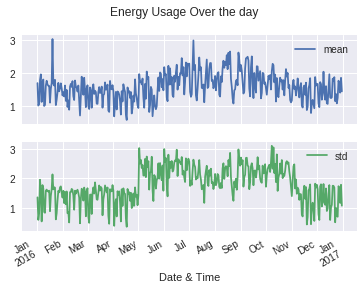

In [79]:
r = df['Usage [kW]'].resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Energy Usage Over the day')
plt.show()


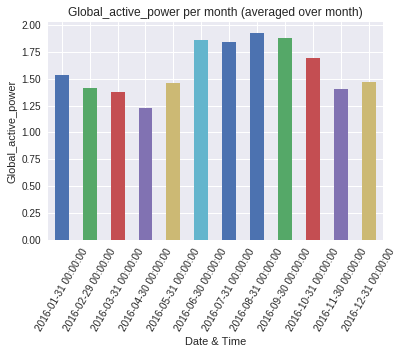

In [80]:
df['Usage [kW]'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()


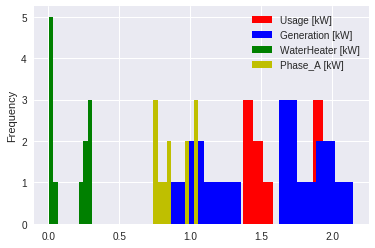

In [81]:
df['Usage [kW]'].resample('M').mean().plot(kind='hist', color='r', legend=True )
df['Generation [kW]'].resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df['WaterHeater [kW]'].resample('M').mean().plot(kind='hist', color='g', legend=True)
df['Phase_A [kW]'].resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()


##### The correlations between 'Usage', 'Generation'


In [0]:
import seaborn as sns

In [0]:
#data_returns = df.pct_change()
#sns.jointplot(x='Usage [kW]', y='Generation [kW]', data=data_returns)  

#plt.show()


#LSTM

LSTM with 100 neurons in the first visible layer
The final output is the Energy usage 
Start

##LSTM Data Preparation

Scaling:

In [0]:
split = 24*20
#Train
X_train = m12h.iloc[:split,4:-2].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,4:-2].values
y_test = m12h.iloc[split:,0].values


In [84]:
print('y_test:', y_test.shape)
print('X_train:' , X_train.shape)


y_test: (217,)
X_train: (480, 17)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


##Model:

In [86]:
X_train.shape

(480, 17, 1)

In [0]:
model = Sequential()
layers = [1, 50,100, 1]


In [88]:
model.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(layers[2],return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(layers[3]))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [89]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 10


In [91]:
model.fit(X_train, y_train,batch_size=16, nb_epoch=epochs, validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 456 samples, validate on 24 samples
Epoch 1/10
456/456 [==============================] - 2s 4ms/step - loss: 1.7509 - acc: 0.0000e+00 - val_loss: 2.4528 - val_acc: 0.0000e+00
Epoch 2/10
456/456 [==============================] - 1s 1ms/step - loss: 1.3754 - acc: 0.0000e+00 - val_loss: 2.1133 - val_acc: 0.0000e+00
Epoch 3/10
456/456 [==============================] - 1s 2ms/step - loss: 1.2464 - acc: 0.0000e+00 - val_loss: 1.8316 - val_acc: 0.0000e+00
Epoch 4/10
456/456 [==============================] - 1s 2ms/step - loss: 1.1628 - acc: 0.0000e+00 - val_loss: 2.2078 - val_acc: 0.0000e+00
Epoch 5/10
456/456 [==============================] - 1s 1ms/step - loss: 1.0919 - acc: 0.0000e+00 - val_loss: 1.8113 - val_acc: 0.0000e+00
Epoch 6/10
456/456 [==============================] - 1s 1ms/step - loss: 1.1250 - acc: 0.0000e+00 - val_loss: 1.9443 - val_acc: 0.0000e+00
Epoch 7/10
456/456 [==============================] - 1s 1ms/step - loss: 1.1148 - acc: 0.0000e+00 - val_loss: 1.71

In [92]:
prediction = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.7974871756843708
Test accuracy: 0.0


###Graph

Text(0.5, 0, 'Next 200 Hours')

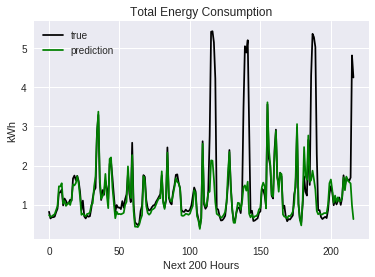

In [93]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')

Result shows that this model can predict anytime in future with features on smart meters.  

Since the goal of this research is about prediction under uncertainty.  

In [0]:
split = 24*20
#Train
X_train = m12h.iloc[:split,1:15].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,1:15].values
y_test = m12h.iloc[split:,0].values


In [95]:
weather.shape

(8760, 13)

In [96]:
X_train.shape[0]

480

In [0]:
X_train_Weather = weather[-X_train.shape[0]:]
split = 24*20
#Train
X_train = m12h.iloc[:split,1:].values
y_train = m12h.iloc[:split,0].values
#Test
X_test = m12h.iloc[split:,1:].values
y_test = m12h.iloc[split:,0].values


## Pure time series model: No features

This would be our base model. Without any features at first. There will be only the one input layer containing the last hour Energy Consumption   
And the goal of this model is to predict the following 10 days energy consumption solely based on the time

We will not 

In [0]:
split = 24*20
#Train
training_set = m12h.iloc[:split,1:2].values
test_set = m12h.iloc[split:,1:2].values


In [99]:
training_set[0]

array([0.00958722])

Lets see what it looks like:

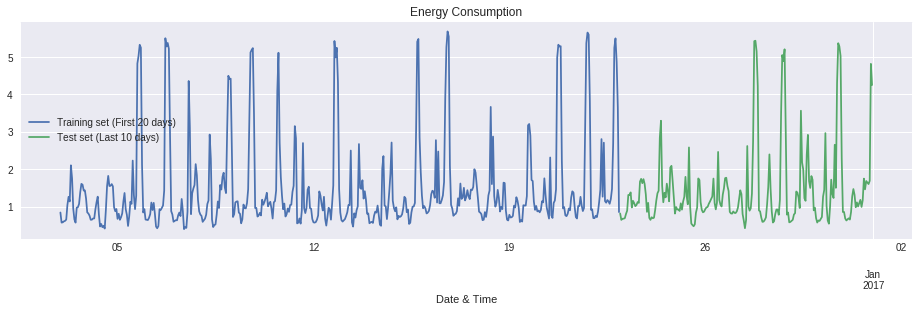

In [100]:
m12h["Usage [kW]"][:split].plot(figsize=(16,4),legend=True)
m12h["Usage [kW]"][split:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (First 20 days)','Test set (Last 10 days)'])
plt.title('Energy Consumption')
plt.show()

In [0]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output   
So for each element of training set, we have 60 previous training set elements 


In [0]:
X_train = []
y_train = []
for i in range(80,480):
    X_train.append(training_set_scaled[i-80:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [104]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=8,batch_size=32)

Epoch 1/8
400/400 [==============================] - 5s 13ms/step - loss: 0.0587
Epoch 2/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0478
Epoch 3/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0472
Epoch 4/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0432
Epoch 5/8
400/400 [==============================] - 2s 6ms/step - loss: 0.0449
Epoch 6/8
400/400 [==============================] - 2s 6ms/step - loss: 0.0416
Epoch 7/8
400/400 [==============================] - 2s 6ms/step - loss: 0.0395
Epoch 8/8
400/400 [==============================] - 3s 6ms/step - loss: 0.0385


In [0]:
dataset_total = pd.concat((m12h["Usage [kW]"][:split],m12h["Usage [kW]"][split:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


In [0]:
X_test = []
for i in range(80,278):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Text(0.5, 0, 'Next 200 Hours')

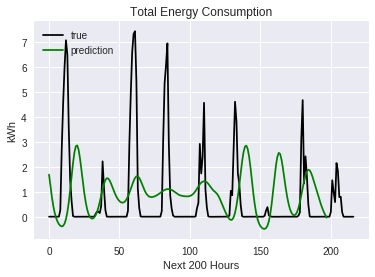

In [107]:
plt.figure(1)
plt.plot(test_set,label='true',color = 'black')
plt.plot(predicted_stock_price,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')

##LSTM 2:

In [108]:
print('y_test:', y_test.shape)
print('X_train:' , X_train.shape)


y_test: (217,)
X_train: (400, 80, 1)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


##Model:

In [110]:
X_train.shape

(400, 80, 1)

In [0]:
model = Sequential()
layers = [1, 50,100, 1]


In [0]:
model.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(layers[2],return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(layers[3]))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])


In [113]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 10


In [115]:
model.fit(X_train, y_train,batch_size=16, nb_epoch=epochs, validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 380 samples, validate on 20 samples
Epoch 1/10
380/380 [==============================] - 5s 12ms/step - loss: 0.0521 - acc: 0.0026 - val_loss: 0.0342 - val_acc: 0.0000e+00
Epoch 2/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0375 - acc: 0.0026 - val_loss: 0.0435 - val_acc: 0.0000e+00
Epoch 3/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0343 - acc: 0.0053 - val_loss: 0.0545 - val_acc: 0.0000e+00
Epoch 4/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0328 - acc: 0.0053 - val_loss: 0.0498 - val_acc: 0.0000e+00
Epoch 5/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0259 - acc: 0.0053 - val_loss: 0.0313 - val_acc: 0.0000e+00
Epoch 6/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0209 - acc: 0.0053 - val_loss: 0.0271 - val_acc: 0.0000e+00
Epoch 7/10
380/380 [==============================] - 2s 6ms/step - loss: 0.0199 - acc: 0.0053 - val_loss: 0.0283 - val_acc: 0.0000e+00
Ep

###Graph

In [0]:
dataset_total = pd.concat((m12h["Usage [kW]"][:split],m12h["Usage [kW]"][split:]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 80:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


In [0]:
X_test = []
for i in range(80,278):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Text(0.5, 0, 'Next 200 Hours')

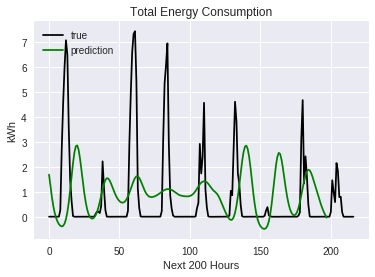

In [118]:
plt.figure(1)
plt.plot(test_set,label='true',color = 'black')
plt.plot(predicted_stock_price,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('Next 200 Hours')